STEP 01: DATA CLEANING WITH PYTHON LIBRARIES (For Data Analytics)

In [1]:
# Car_Price
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#import seaborn as sns

dataset = pd.read_csv('car_price.csv')
#to check how much data is there
dataset.shape

(5512, 9)

In [2]:
dataset.head(5511)

,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
0,Jeep Compass 2.0 Longitude Option BSIV,10.03 Lakh,"86,226 kms",Diesel,Manual,1st Owner,2017.0,1956 cc,5 Seats
1,Renault Duster RXZ Turbo CVT,NaN,"13,248 kms",Petrol,Automatic,1st Owner,2021.0,1330 cc,5 Seats
2,Toyota Camry 2.5 G,16.40 Lakh,"60,343 kms",Petrol,Automatic,1st Owner,2016.0,2494 cc,5 Seats
3,Honda Jazz VX CVT,7.77 Lakh,"26,696 kms",Petrol,Automatic,1st Owner,2018.0,NaN,5 Seats
4,Volkswagen Polo 1.2 MPI Highline,5.15 Lakh,"69,414 kms",Petrol,Manual,1st Owner,2016.0,1199 cc,NaN
...,...,...,...,...,...,...,...,...,...
5506,BMW X5 xDrive 30d,32.90 Lakh,"99,000 kms",Diesel,Automatic,1st Owner,2015.0,1999 cc,5 Seats
5507,BMW X1 sDrive 20d xLine,28.90 Lakh,"45,000 kms",Diesel,Automatic,1st Owner,2018.0,2995 cc,7 Seats
5508,BMW M Series M4 Coupe,64.90 Lakh,"29,000 kms",Petrol,Automatic,2nd Owner,2015.0,1968 cc,5 Seats
5509,Jaguar XF 2.2 Litre Luxury,13.75 Lakh,"90,000 kms",Diesel,Automatic,2nd Owner,2013.0,2755 cc,5 Seats


In [3]:
#to check data type
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5512 entries, 0 to 5511
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   car_name             5512 non-null   object 
 1   car_prices_in_rupee  5505 non-null   object 
 2   kms_driven           5507 non-null   object 
 3   fuel_type            5512 non-null   object 
 4   transmission         5508 non-null   object 
 5   ownership            5499 non-null   object 
 6   manufacture          5511 non-null   float64
 7   engine               5504 non-null   object 
 8   Seats                5501 non-null   object 
dtypes: float64(1), object(8)
memory usage: 387.7+ KB


In [4]:
#to check missing data
dataset.isnull()

,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
0,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...
5507,False,False,False,False,False,False,False,False,False
5508,False,False,False,False,False,False,False,False,False
5509,False,False,False,False,False,False,False,False,False
5510,False,False,False,False,False,False,False,False,False


In [5]:
dataset.isnull().sum()  

car_name                0
car_prices_in_rupee     7
kms_driven              5
fuel_type               0
transmission            4
ownership              13
manufacture             1
engine                  8
Seats                  11
dtype: int64

In [6]:
#to get % of how much  data is missing
(dataset.isnull().sum()/dataset.shape[0])*100  # shape[0] === 5512

car_name               0.000000
car_prices_in_rupee    0.126996
kms_driven             0.090711
fuel_type              0.000000
transmission           0.072569
ownership              0.235849
manufacture            0.018142
engine                 0.145138
Seats                  0.199565
dtype: float64

In [7]:
#now we remove this data
dataset.dropna( inplace=True)  #if we want to fill data, we'll write 'fillna'

In [8]:
#to recheck if data is removed or not
(dataset.isnull().sum()/dataset.shape[0])*100  # shape[0] === 5512

car_name               0.0
car_prices_in_rupee    0.0
kms_driven             0.0
fuel_type              0.0
transmission           0.0
ownership              0.0
manufacture            0.0
engine                 0.0
Seats                  0.0
dtype: float64

In [9]:
#car_name
#splitting a coulmn name car_name into two columns i.e., 'company name & car name'
def company_name(x):
    return x[:x.index(" ")]
dataset["company_name"] = dataset["car_name"].apply(company_name)
def car_name(x):
    return x[x.index(" ")+1:]

dataset["car_name"] = dataset["car_name"].apply(car_name)

dataset.head(3)

,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats,company_name
0,Compass 2.0 Longitude Option BSIV,10.03 Lakh,"86,226 kms",Diesel,Manual,1st Owner,2017.0,1956 cc,5 Seats,Jeep
2,Camry 2.5 G,16.40 Lakh,"60,343 kms",Petrol,Automatic,1st Owner,2016.0,2494 cc,5 Seats,Toyota
7,WR-V VX Diesel,11.60 Lakh,"14,470 kms",Diesel,Manual,1st Owner,2021.0,1498 cc,5 Seats,Honda


In [10]:
#car_prices_in_rupees
#to remove comma
dataset["car_prices_in_rupee"].str.replace(",","")

0       10.03 Lakh
2       16.40 Lakh
7       11.60 Lakh
8        6.99 Lakh
11       5.43 Lakh
           ...    
5507    28.90 Lakh
5508    64.90 Lakh
5509    13.75 Lakh
5510    29.90 Lakh
5511    31.90 Lakh
Name: car_prices_in_rupee, Length: 5471, dtype: object

In [11]:
#now converting lakhs and crore into thousands
def car_rupee(x):
    p=x.split(" ")
    try:
        if p[1] == "Lakh":
            return str(round(float(p[0])*100000,1))
        elif p[1] =="Crore":
            return str(roundfloat(p[0])*10000000,1)
    except:
        return x

dataset["car_prices_in_rupee"] = dataset ["car_prices_in_rupee"].apply(car_rupee)
#dataset["car_prices_in_rupee"] = dataset["car_prices_in_rupee"].astype("float") #changing data type
dataset.head(3)

,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats,company_name
0,Compass 2.0 Longitude Option BSIV,1003000.0,"86,226 kms",Diesel,Manual,1st Owner,2017.0,1956 cc,5 Seats,Jeep
2,Camry 2.5 G,1640000.0,"60,343 kms",Petrol,Automatic,1st Owner,2016.0,2494 cc,5 Seats,Toyota
7,WR-V VX Diesel,1160000.0,"14,470 kms",Diesel,Manual,1st Owner,2021.0,1498 cc,5 Seats,Honda


In [12]:
#dataset['car_prices_in_rupee']=dataset['car_prices_in_rupee'].astype("float64")

In [13]:
#kms_driven
#removing comma and kms

dataset['kms_driven'] = dataset['kms_driven'].str.replace(",","")  
dataset['kms_driven'] = dataset['kms_driven'].str.replace("kms","") 
dataset['kms_driven'] = dataset['kms_driven'].astype("int64")
dataset.head(3)

,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats,company_name
0,Compass 2.0 Longitude Option BSIV,1003000.0,86226,Diesel,Manual,1st Owner,2017.0,1956 cc,5 Seats,Jeep
2,Camry 2.5 G,1640000.0,60343,Petrol,Automatic,1st Owner,2016.0,2494 cc,5 Seats,Toyota
7,WR-V VX Diesel,1160000.0,14470,Diesel,Manual,1st Owner,2021.0,1498 cc,5 Seats,Honda


In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5471 entries, 0 to 5511
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   car_name             5471 non-null   object 
 1   car_prices_in_rupee  5471 non-null   object 
 2   kms_driven           5471 non-null   int64  
 3   fuel_type            5471 non-null   object 
 4   transmission         5471 non-null   object 
 5   ownership            5471 non-null   object 
 6   manufacture          5471 non-null   float64
 7   engine               5471 non-null   object 
 8   Seats                5471 non-null   object 
 9   company_name         5471 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 470.2+ KB


In [15]:
#engine
dataset['engine'] = dataset['engine'].str.replace("cc","") 
dataset['engine'] = dataset['engine'].astype("int64")
dataset.head(3)

,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats,company_name
0,Compass 2.0 Longitude Option BSIV,1003000.0,86226,Diesel,Manual,1st Owner,2017.0,1956,5 Seats,Jeep
2,Camry 2.5 G,1640000.0,60343,Petrol,Automatic,1st Owner,2016.0,2494,5 Seats,Toyota
7,WR-V VX Diesel,1160000.0,14470,Diesel,Manual,1st Owner,2021.0,1498,5 Seats,Honda


In [16]:
#seats
dataset['Seats'] = dataset['Seats'].str.replace("Seats","") 
dataset['Seats'] = dataset['Seats'].astype("int64")
dataset.head(3)

,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats,company_name
0,Compass 2.0 Longitude Option BSIV,1003000.0,86226,Diesel,Manual,1st Owner,2017.0,1956,5,Jeep
2,Camry 2.5 G,1640000.0,60343,Petrol,Automatic,1st Owner,2016.0,2494,5,Toyota
7,WR-V VX Diesel,1160000.0,14470,Diesel,Manual,1st Owner,2021.0,1498,5,Honda


In [17]:
#manufacture
dataset['manufacture']=pd.to_datetime(dataset['manufacture']) # to format date
dataset['manufacture'] = dataset['manufacture'].astype("int64")
dataset.head(3)

,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats,company_name
0,Compass 2.0 Longitude Option BSIV,1003000.0,86226,Diesel,Manual,1st Owner,2017,1956,5,Jeep
2,Camry 2.5 G,1640000.0,60343,Petrol,Automatic,1st Owner,2016,2494,5,Toyota
7,WR-V VX Diesel,1160000.0,14470,Diesel,Manual,1st Owner,2021,1498,5,Honda


STEP 02: DATA CLEANING WITH ML LIBRARIES (FOR DATA SCIENCE)

In [18]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [19]:
#car_name
car_name_en = LabelEncoder()
dataset['car_name_ml'] = car_name_en.fit_transform(dataset['car_name'])
dataset.head(3)

,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats,company_name,car_name_ml
0,Compass 2.0 Longitude Option BSIV,1003000.0,86226,Diesel,Manual,1st Owner,2017,1956,5,Jeep,424
2,Camry 2.5 G,1640000.0,60343,Petrol,Automatic,1st Owner,2016,2494,5,Toyota,288
7,WR-V VX Diesel,1160000.0,14470,Diesel,Manual,1st Owner,2021,1498,5,Honda,1628


In [20]:
#fuel_type
fuel_type_en = LabelEncoder()
dataset['fuel_type_ml'] = fuel_type_en.fit_transform(dataset['fuel_type'])
dataset.head(3)

,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats,company_name,car_name_ml,fuel_type_ml
0,Compass 2.0 Longitude Option BSIV,1003000.0,86226,Diesel,Manual,1st Owner,2017,1956,5,Jeep,424,1
2,Camry 2.5 G,1640000.0,60343,Petrol,Automatic,1st Owner,2016,2494,5,Toyota,288,4
7,WR-V VX Diesel,1160000.0,14470,Diesel,Manual,1st Owner,2021,1498,5,Honda,1628,1


In [21]:
#transmission
transmission_en = LabelEncoder()
dataset['transmission_ml'] = transmission_en.fit_transform(dataset['transmission'])
dataset.head(3)

,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats,company_name,car_name_ml,fuel_type_ml,transmission_ml
0,Compass 2.0 Longitude Option BSIV,1003000.0,86226,Diesel,Manual,1st Owner,2017,1956,5,Jeep,424,1,1
2,Camry 2.5 G,1640000.0,60343,Petrol,Automatic,1st Owner,2016,2494,5,Toyota,288,4,0
7,WR-V VX Diesel,1160000.0,14470,Diesel,Manual,1st Owner,2021,1498,5,Honda,1628,1,1


In [22]:
#ownership	
ownership_en = LabelEncoder()
dataset['ownership_ml'] = ownership_en.fit_transform(dataset['ownership'])
dataset.head(1)

,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats,company_name,car_name_ml,fuel_type_ml,transmission_ml,ownership_ml
0,Compass 2.0 Longitude Option BSIV,1003000.0,86226,Diesel,Manual,1st Owner,2017,1956,5,Jeep,424,1,1,1


In [23]:
#dataset.drop(columns=['ownership_ml'], inplace=True) -> to drop a column

In [24]:
#manufacture
#we have only year in it, but if we have complete data and need to split it, we will write
#dataset['manufacture'] = dataset['manufacture'].dt.year

In [25]:
#company_name
company_name_en = LabelEncoder()
dataset['company_name_ml'] = company_name_en.fit_transform(dataset['company_name'])
dataset.head(1)

,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats,company_name,car_name_ml,fuel_type_ml,transmission_ml,ownership_ml,company_name_ml
0,Compass 2.0 Longitude Option BSIV,1003000.0,86226,Diesel,Manual,1st Owner,2017,1956,5,Jeep,424,1,1,1,12


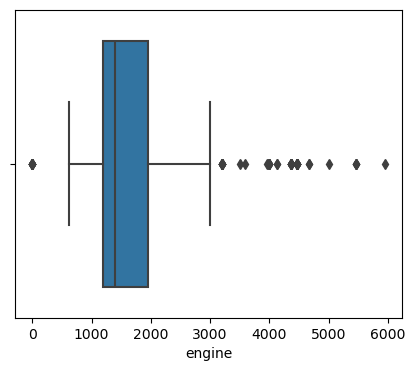

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# to check outliers
plt.figure(figsize=(5,4))
sns.boxplot(x="engine", data=dataset)
plt.show()


In [48]:
import pandas as pd
import numpy as np

#to remove outliers
q1 = np.quantile(dataset['engine'],0.25)
q3 = np.quantile(dataset['engine'],0.75)

iqr = q3-q1

#to find out min and max range

min = q1 - (1.5*iqr)
max = q3 + (1.5*iqr)

dataset[dataset['engine']<=max].shape # outliers are removed -> to write .shape or not, upto us


(5417, 15)

In [46]:
from sklearn.preprocessing import StandardScaler
import pandas as pd


numerical_columns = dataset.select_dtypes(include=['float64', 'int64']).columns

ss = StandardScaler()


new_data = dataset[numerical_columns] = ss.fit_transform(dataset[numerical_columns])


dataset.head(3)

,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats,company_name,car_name_ml,fuel_type_ml,transmission_ml,ownership_ml,company_name_ml
0,Compass 2.0 Longitude Option BSIV,1003000.0,0.545541,Diesel,Manual,1st Owner,0.395673,0.729184,-0.349364,Jeep,424,1,1,1,12
2,Camry 2.5 G,1640000.0,-0.071996,Petrol,Automatic,1st Owner,0.141538,1.656932,-0.349364,Toyota,288,4,0,1,29
7,WR-V VX Diesel,1160000.0,-1.166471,Diesel,Manual,1st Owner,1.412217,-0.060610,-0.349364,Honda,1628,1,1,1,8
